In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_names = {'ID Code': 'ID','People Near Car-Free Places':'pct near carfree', 'People Near Transit': 'pct near transit', 'People Near Services (Healthcare and Schools both)': 'pct near services','Weighted Population Density (people / km2)': 'ppl/km2','Mean Block Density (blocks / km2)': 'blocks/km2','Total population of urban agglomeration': 'pop'}

In [295]:
df = pd.read_csv(r'Pedestrians_First_all_data.csv')

In [296]:
# Separate city from the country code
df['City'] = df['Agglomeration name'].str.split('[', expand = True)[0].str[:-1]
df['Country'] = df['Agglomeration name'].str.split('[', expand = True)[1].str[:-1]
df = df.drop(['Agglomeration name'], axis = 1)

In [297]:
df = df.rename(columns = new_names)
df = df.replace('Not available',np.nan)

In [298]:
df

,ID,pct near transit,pct near carfree,pct near services,ppl/km2,blocks/km2,pop,Reliability of indicators,Geographical Region,Subregion,City,Country
0,12080,NaN,11%,10%,"24,329",15,"40,589,878",Very Unreliable,Asia,Eastern Asia,"Guangzhou, Guangdong",CHN
1,11862,2%,6%,34%,"16,048",62,"36,312,539",Unreliable,Asia,South-Eastern Asia,Jakarta,IDN
2,12964,NaN,48%,77%,"9,715",102,"33,028,731",Somewhat Reliable,Asia,Eastern Asia,Tokyo,JPN
3,6955,18%,18%,17%,"25,787",60,"26,658,714",Unreliable,Asia,Southern Asia,Delhi,IND
4,12400,NaN,11%,15%,"26,924",11,"24,472,119",Very Unreliable,Asia,Eastern Asia,Shanghai,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...
957,12056,NaN,5%,4%,"12,314",9,"519,778",Very Unreliable,Asia,Eastern Asia,Zhujiang,CHN
958,1411,NaN,11%,28%,"12,871",80,"519,584",Somewhat Reliable,Latin America and the Caribbean,South America,Feira De Santana,BRA
959,1642,NaN,14%,87%,"10,208",49,"519,440",Unreliable,Africa,Western Africa,Bouake,CIV
960,9345,NaN,11%,8%,"33,992",40,"519,351",Unreliable,Asia,Southern Asia,Brahmapur,IND


In [300]:
# Turn pct into floats
for col in ['pct near transit','pct near carfree','pct near services']:
    df[col] = df[col].str.strip('%').astype('Int64')/100

# Turn numbers into ints
for col in ['ppl/km2','pop']:
    df[col] = df[col].str.replace(',','').astype(int)
    

AttributeError: Can only use .str accessor with string values!

In [301]:
df

,ID,pct near transit,pct near carfree,pct near services,ppl/km2,blocks/km2,pop,Reliability of indicators,Geographical Region,Subregion,City,Country
0,12080,<NA>,0.11,0.1,24329,15,40589878,Very Unreliable,Asia,Eastern Asia,"Guangzhou, Guangdong",CHN
1,11862,0.02,0.06,0.34,16048,62,36312539,Unreliable,Asia,South-Eastern Asia,Jakarta,IDN
2,12964,<NA>,0.48,0.77,9715,102,33028731,Somewhat Reliable,Asia,Eastern Asia,Tokyo,JPN
3,6955,0.18,0.18,0.17,25787,60,26658714,Unreliable,Asia,Southern Asia,Delhi,IND
4,12400,<NA>,0.11,0.15,26924,11,24472119,Very Unreliable,Asia,Eastern Asia,Shanghai,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...
957,12056,<NA>,0.05,0.04,12314,9,519778,Very Unreliable,Asia,Eastern Asia,Zhujiang,CHN
958,1411,<NA>,0.11,0.28,12871,80,519584,Somewhat Reliable,Latin America and the Caribbean,South America,Feira De Santana,BRA
959,1642,<NA>,0.14,0.87,10208,49,519440,Unreliable,Africa,Western Africa,Bouake,CIV
960,9345,<NA>,0.11,0.08,33992,40,519351,Unreliable,Asia,Southern Asia,Brahmapur,IND


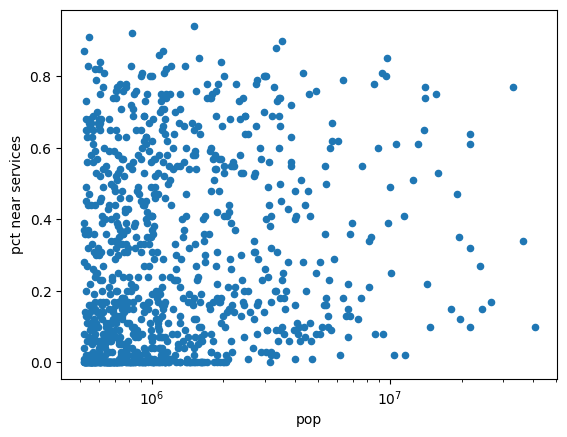

In [306]:
df.plot(kind = 'scatter',x = 'pop',y = 'pct near services', logx = True)
plt.show()